In [2]:
# imports
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import MDS, TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plot_style = {
    # For latex-quality, i.e., publication quality legends and labels on graphs.
    # Warning: you must have installed LaTeX on your system. Else set it to False.
    "text.usetex": True, 
    
    # configure fonts
    "font.size":12,             # default font size
    "font.family":'serif',
    "legend.fontsize": 8,
    "axes.labelsize": 8,
    "axes.titlesize":9,
    "xtick.labelsize" : 8,
    "ytick.labelsize" : 8,
    
    # configure figure
    "figure.dpi": 144,
    "figure.figsize":'10,5',
    "figure.titlesize":14
}

from scipy.cluster import hierarchy
from scipy.spatial import distance

In [3]:
X = np.load('X_pca.npy')
X_raw = np.load('X.npy')
X_log = np.log2(X_raw+1)

## Ward Linkage

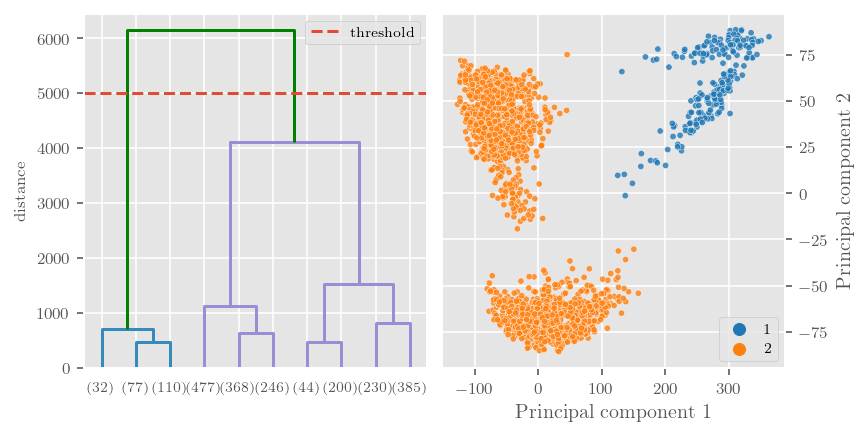

In [9]:
# computing the distance matrix for all observations with the first two PC's
pcs = 2
Y = distance.pdist(X[:, :pcs], metric='euclidean')
link = 'ward'
Z = hierarchy.linkage(Y, method=link, metric='euclidean')

plot_style["figure.figsize"] = '6, 3'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)


t = 5000

fig, axes = plt.subplots(1, 2)
dn = hierarchy.dendrogram(
    Z, above_threshold_color="green",ax = axes[0], leaf_font_size=7, color_threshold=t, truncate_mode='lastp', p=10)
axes[0].set_ylabel('distance');
axes[0].axhline(t, ls='--', label='threshold')
axes[0].legend(fontsize=7)


labels = hierarchy.fcluster(Z, t=t, criterion='distance')

x_comp = 0
y_comp = 1

# axes[1].scatter(X[:,x_comp], X[:,y_comp], s=10, alpha=0.5, c=labels, edgecolors={'white'}, cmap='tab10')
sns.scatterplot(x=X[:,x_comp], y=X[:,y_comp],
                hue=labels, alpha=0.8,s=10,
                edgecolors='white', palette='tab10', 
                ax = axes[1], 
                legend='auto' )
axes[1].legend(fontsize=7)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set_xlabel(r"Principal component 1", size=10);
axes[1].set_ylabel(r"Principal component 2", size=10);

plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5);
plt.savefig(f'hierarchical_clustering/{link}_linkage_{t}_pc{pcs}.pdf')
np.save(f'hierarchical_clustering/{link}_linakge_t-{t}_labels_pc{pcs}.npy', labels)

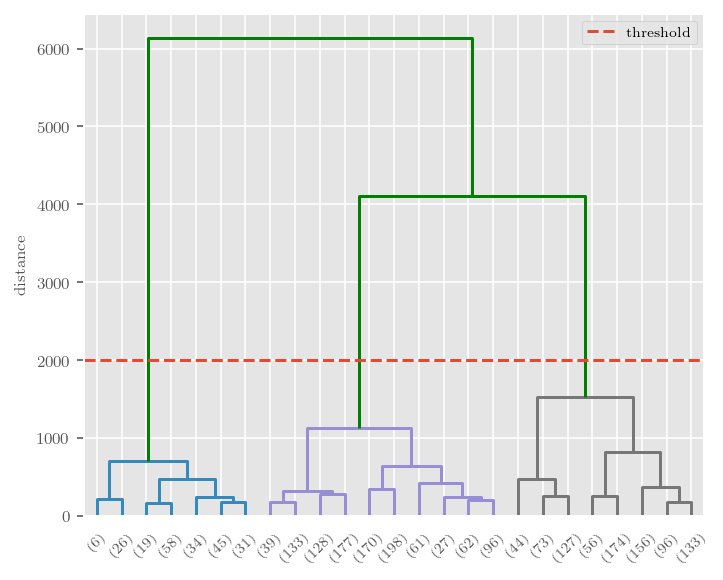

In [7]:
plot_style["figure.figsize"] = '5, 4'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

pcs = 2
Y = distance.pdist(X[:, :pcs], metric='euclidean')
link = 'ward'
Z = hierarchy.linkage(Y, method=link, metric='euclidean')

dn = hierarchy.dendrogram(
    Z, above_threshold_color="green", leaf_font_size=7, color_threshold=t, truncate_mode='lastp', p=25)
plt.ylabel('distance');
plt.axhline(t, ls='--', label='threshold')
plt.legend(fontsize=7)
plt.tight_layout(pad=0.5, h_pad=0.5, w_pad=0.5);

plt.savefig(f'hierarchical_clustering/dendogram_{link}_linkage_{t}_pc{pcs}.pdf')

In [13]:
Y = distance.pdist(X[:, :2], metric='euclidean')
link = 'ward'
Z = hierarchy.linkage(Y, method=link, metric='euclidean')

print(f'{link} linkage')
for t in [2000, 5000]:
    labels = hierarchy.fcluster(Z, t=t, criterion='distance')
    print(f'n_clusters = {len(np.unique(labels))}, t={t} silhouette score: {round(silhouette_score(X, labels), 4)}')

ward linkage
n_clusters = 3, t=2000 silhouette score: 0.0883
n_clusters = 2, t=5000 silhouette score: 0.2957


In [17]:
Y = distance.pdist(X[:, :2], metric='euclidean')
link = 'single'
Z = hierarchy.linkage(Y, method=link, metric='euclidean')

print(f'{link} linkage')
for t in [18, 25, 29, 31, 35]:
    labels = hierarchy.fcluster(Z, t=t, criterion='distance')
    print(f'n_clusters = {len(np.unique(labels))}, t={t} silhouette score: {round(silhouette_score(X, labels), 4)}')

single linkage
n_clusters = 6, t=18 silhouette score: 0.079
n_clusters = 5, t=25 silhouette score: 0.0802
n_clusters = 4, t=29 silhouette score: 0.1446
n_clusters = 3, t=31 silhouette score: 0.2059
n_clusters = 2, t=35 silhouette score: 0.1606


In [18]:
Y = distance.pdist(X[:, :2], metric='euclidean')
link = 'complete'
Z = hierarchy.linkage(Y, method=link, metric='euclidean')

print(f'{link} linkage')
for t in [250, 400]:
    labels = hierarchy.fcluster(Z, t=t, criterion='distance')
    print(f'n_clusters = {len(np.unique(labels))}, t={t} silhouette score: {round(silhouette_score(X, labels), 4)}')

complete linkage
n_clusters = 3, t=250 silhouette score: 0.1246
n_clusters = 2, t=400 silhouette score: 0.2983


In [21]:
y = {
    'ward':np.load('hierarchical_clustering/ward_linakge_t-2000_labels.npy'),
    'complete':np.load('hierarchical_clustering/complete_linakge_t-250_labels.npy'),
    'single': np.load('hierarchical_clustering/single_linakge_t-25_labels.npy')
}


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
from sklearn.model_selection import cross_val_score

In [22]:
for link in y:
    print(f'n_clusters = {len(np.unique(y[link]))} ({link} linkage) silhouette score: {round(silhouette_score(X, y[link]), 4)}')

n_clusters = 3 (ward linkage) silhouette score: 0.0883
n_clusters = 3 (complete linkage) silhouette score: 0.1246
n_clusters = 5 (single linkage) silhouette score: 0.0802


In [23]:
features = {
    'ward':{},
    'complete':{},
    'single':{}
    
}
for link in y:
    
    X_train, X_test, y_train, y_test = train_test_split(X_log, y[link] , test_size=0.2, random_state=42)
    model = LogisticRegression(penalty='l1',
                                C=0.1,  
                                solver='liblinear',  
                                multi_class='ovr')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    features[link]['coef'] = model.coef_
    score = accuracy_score(y_test, y_pred)
    print(f'model accuracy score ({link} linkage): {score}')

model accuracy score (ward linkage): 1.0
model accuracy score (complete linkage): 0.967741935483871
model accuracy score (single linkage): 1.0


In [24]:
for link in features:
    sum_coef = np.sum(np.abs(features[link]['coef']), axis=0, keepdims=True)
    sum_coef_df = pd.DataFrame(sum_coef)
    sum_coef_df.sort_values(0, axis=1, ascending=False, inplace=True)
    features[link]['idx_sum'] = sum_coef_df.columns[:100].to_numpy()
    features[link]['sum'] = sum_coef_df.iloc[:100]
    np.save(f'feature_idx_by_sum_{link}.npy',features[link]['idx_sum'] , allow_pickle=True)
    np.save(f'feature_by_sum_{link}.npy',features[link]['sum'] , allow_pickle=True)
                      
    max_coef = np.max(np.abs(features[link]['coef']), axis=0, keepdims=True)
    max_coef_df = pd.DataFrame(max_coef)
    max_coef_df.sort_values(0, axis=1, ascending=False, inplace=True)
    features[link]['idx_max'] = max_coef_df.columns[:100].to_numpy()
    features[link]['max'] = max_coef_df.iloc[:100]
    np.save(f'feature_idx_by_max_{link}.npy',features[link]['idx_max'] , allow_pickle=True)
    np.save(f'feature_by_max_{link}.npy',features[link]['max'] , allow_pickle=True)

In [25]:
X_train = np.load('../p2_evaluation_reduced/X_train.npy')
X_test = np.load('../p2_evaluation_reduced/X_test.npy')
y_train = np.load('../p2_evaluation_reduced/y_train.npy')
y_test = np.load('../p2_evaluation_reduced/y_test.npy')

In [26]:
X_train = np.log2(X_train+1)
X_test = np.log2(X_test+1)

In [27]:
n, d = X_train.shape
n, d

(1077, 20000)

## Features by max

In [28]:
for link in features:
    X_red_train = X_train[:, features[link]['idx_max']]
    X_red_test = X_test[:, features[link]['idx_max'] ]    

    model = LogisticRegression(penalty='l1',
                                C=0.1,  
                                solver='liblinear',  
                                multi_class='ovr')
    model.fit(X_red_train, y_train)
    y_pred = model.predict(X_red_test)
    features[link]['test_accuracy'] = accuracy_score(y_test, y_pred)
    features[link]['train_accuracy'] = accuracy_score(y_train, model.predict(X_red_train))
    print(f'{link} linkage: test accuracy: {round(features[link]["test_accuracy"], 5)},train accuracy {round(features[link]["train_accuracy"], 5)}')

ward linkage: test accuracy: 0.85289,train accuracy 0.92479
complete linkage: test accuracy: 0.78339,train accuracy 0.92015
single linkage: test accuracy: 0.85199,train accuracy 0.92665


## Features by sum

In [63]:
for link in features:
    X_red_train = X_train[:, features[link]['idx_sum']]
    X_red_test = X_test[:, features[link]['idx_sum'] ]    

    model = LogisticRegression(penalty='l1',
                                C=0.1,  
                                solver='liblinear',  
                                multi_class='ovr')
    model.fit(X_red_train, y_train)
    y_pred = model.predict(X_red_test)
    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, model.predict(X_red_train))
    print(f'{link} linkage: test accuracy: {round(accuracy, 5)}, train accuracy {round(train_accuracy, 5)}')

ward linkage: test accuracy: 0.86101, train accuracy 0.948
complete linkage: test accuracy: 0.68863, train accuracy 0.84773
single linkage: test accuracy: 0.8583, train accuracy 0.94058


## High variance features

In [29]:
features_hv_idx = pd.Series(np.var(X_train, axis=0)).sort_values(ascending=False).index[:100]
X_hv_train = X_train[:, features_hv_idx ]
X_hv_test = X_test[:, features_hv_idx ]

model = LogisticRegression(penalty='l1',
                            C=0.1,  
                            solver='liblinear',  
                            multi_class='ovr')
model.fit(X_hv_train, y_train)
y_pred = model.predict(X_hv_test)
accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, model.predict(X_hv_train))
print(f'test accuracy: {round(accuracy, 5)}, train accuracy {round(train_accuracy, 5)}')

test accuracy: 0.90884, train accuracy 0.9805


In [30]:
features_hv_idx = pd.Series(np.var(X_train, axis=0)).sort_values(ascending=False).index[:100]
X_hv_train = X_train[:, features_hv_idx ]
X_hv_test = X_test[:, features_hv_idx ]

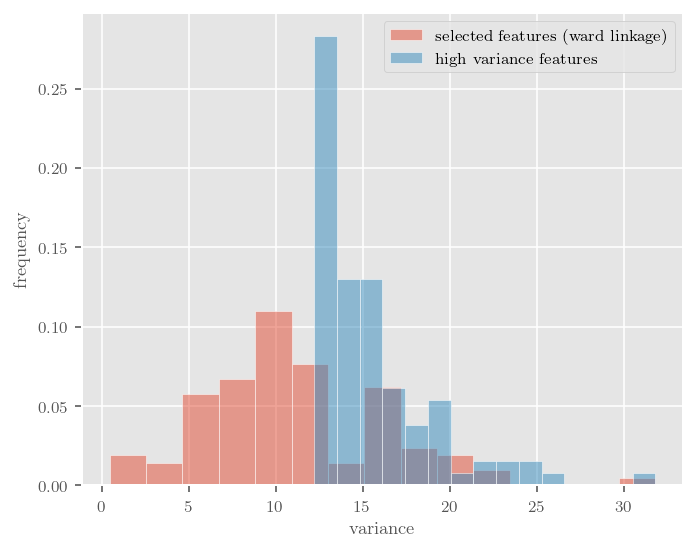

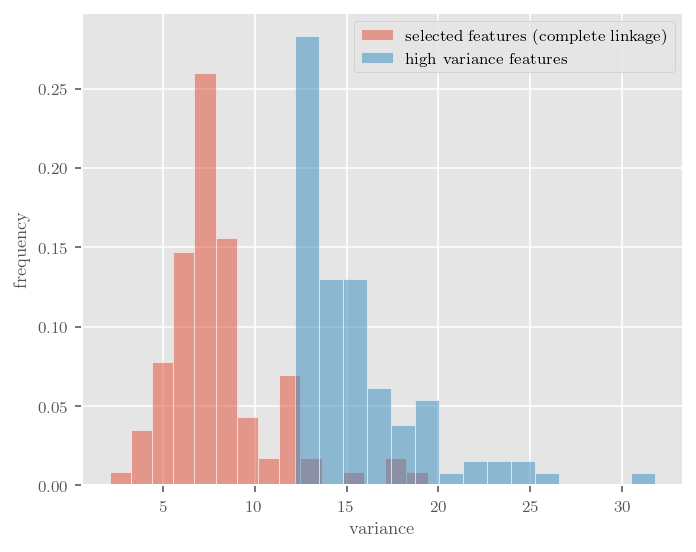

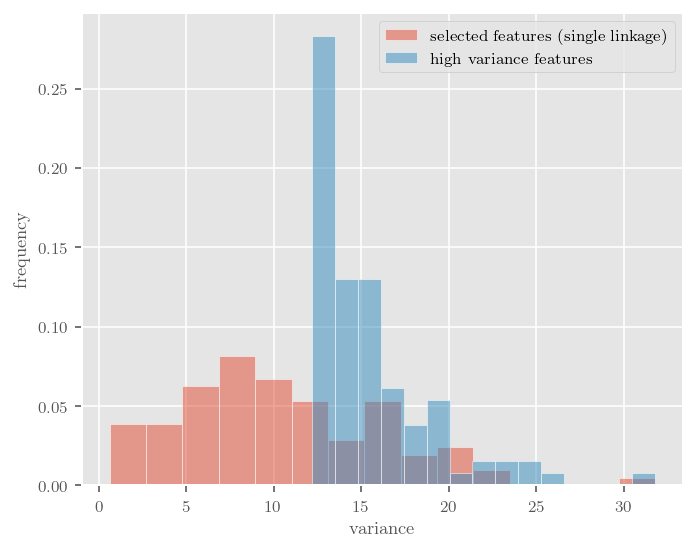

In [38]:
features_hv = pd.Series(np.var(X_hv_train, axis=0))

plot_style["figure.figsize"] = '5, 4'
plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams.update(plot_style)

for link in features:
    X_red_train = X_train[:, features[link]['idx_max']]
    features_selected = pd.Series(np.var(X_red_train, axis=0))


    plt.hist(features_selected, alpha=0.5, bins=15, label=f'selected features ({link} linkage)', edgecolor='white', density=True)
    plt.hist(features_hv, alpha=0.5, bins=15, label='high variance features',  edgecolor='white', density=True)
    plt.xlabel('variance', size=9)
    plt.ylabel('frequency', size=9)


    plt.legend(fontsize=8)
    plt.tight_layout();

    plt.savefig(f'{link}_selected_features_vs_high_variance_features.pdf')
    plt.show()

ward
complete
single


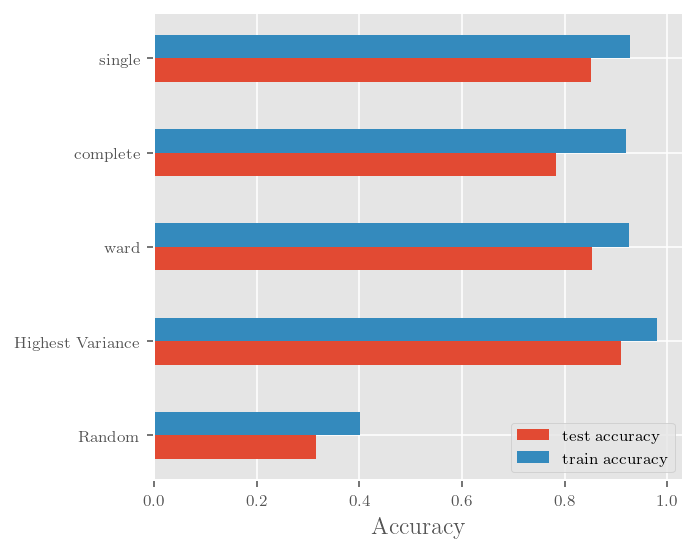

In [34]:
test_accuracy = [0.31588, 0.90884]
train_accuracy = [0.40204, 0.9805]
for link in features:
    test_accuracy.append(features[link]['test_accuracy'])
    train_accuracy.append(features[link]['train_accuracy'])
    print(link)

plt.barh([1, 2, 3, 4, 5], test_accuracy, height=0.25, label='test accuracy',  )
plt.barh([1.25, 2.25, 3.25, 4.25, 5.25], train_accuracy, height=0.25, label='train accuracy' )
plt.yticks([1.125, 2.125, 3.125, 4.125, 5.125], ['Random', 'Highest Variance', 'ward', 'complete', 'single'])
plt.legend(fontsize=8)
plt.xlabel('Accuracy', position='right')
plt.tight_layout();
plt.savefig(f'feature_performace_comparison_barplot.pdf')